In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.optimize as optimize

from IPython.core.display import SVG
from IPython.core.display import HTML

In [12]:
#Reading the data
dataset = pd.read_csv(filepath_or_buffer="ex2data1.txt", delimiter=",", names=["first_exam", "second_exam", "Accepted_or_not"])

dataset.insert(value=np.ones(len(dataset.index)),loc=0, column="Bias")

print(dataset)

    Bias  first_exam  second_exam  Accepted_or_not
0    1.0   34.623660    78.024693                0
1    1.0   30.286711    43.894998                0
2    1.0   35.847409    72.902198                0
3    1.0   60.182599    86.308552                1
4    1.0   79.032736    75.344376                1
..   ...         ...          ...              ...
95   1.0   83.489163    48.380286                1
96   1.0   42.261701    87.103851                1
97   1.0   99.315009    68.775409                1
98   1.0   55.340018    64.931938                1
99   1.0   74.775893    89.529813                1

[100 rows x 4 columns]


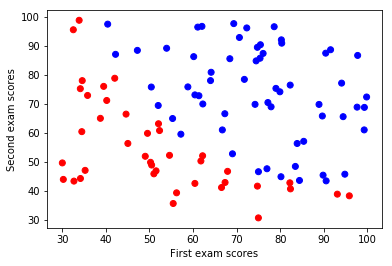

In [14]:
first_exam_scores = dataset["first_exam"].values
second_exam_scores = dataset["second_exam"].values
acceptance = dataset["Accepted_or_not"].values


#map every acceptance stiuation into color, blue accepted, red not accepted
colors = ["blue" if i == 1 else "red" for i in acceptance]


plt.xlabel("First exam scores")
plt.ylabel("Second exam scores")
plt.scatter( x = first_exam_scores, y = second_exam_scores, c = colors)
plt.show("figure")

In [17]:
#Sigmoid function implementation
def sigmoid(x):
    return 1 / (1 + np.exp(-1 * x))

sigmoid(0)

0.5

In [18]:
display(HTML("<p><strong>Cost function</strong><p>"))
display(HTML("<img src='math.svg' width='600px'/>"))
display(HTML("<p><strong>Gradient Function</strong><p>"))
display(HTML("<img src='math2.svg' width='440px'/>"))

In [27]:
#Vectorized cost function
def vecotrized_cost(thetas_matrix, features_matrix, labels_array):
    count = len(labels_array)

    cost = -1 * labels_array * np.log(sigmoid( np.matmul(features_matrix, np.transpose(thetas_matrix)))) - \
            (1 - labels_array) * np.log(1 - sigmoid( np.matmul(features_matrix, np.transpose(thetas_matrix) ) ))
    
    cost = np.sum(cost)
    
    cost = cost * ( 1 / count )   
        
    return cost

In [28]:
# Gradient function for the cost
def gradient(thetas_matrix, features_matrix, labels_array):
    
    count = len(labels_array)        
    
    hypothesis_value = sigmoid( np.matmul(features_matrix, np.transpose(thetas_matrix) ) )
        
    grad = ( 1 / count ) * np.matmul( np.transpose(features_matrix), (hypothesis_value - labels_array))
    
    return grad

In [30]:
#prepare the data for training
labels_array = dataset["Accepted_or_not"].values
labels_array = labels_array[:, np.newaxis]

features_matrix = dataset.loc[:, 'Bias':'second_exam'].values

theta = np.zeros((1,3))    #3 becasuse we have three features


#in this time gonna not use gradient decent algorithm, instead we will use optimize function from scipy library
results  =  optimize.fmin_tnc(func=vecotrized_cost, x0= theta.flatten(), args=(features_matrix, labels_array.flatten()),
                              fprime = gradient)

print(results[0])

[-25.16131869   0.20623159   0.20147149]


In [31]:
theta_optimized = results[0].reshape((1,3))
new_cost = vecotrized_cost(theta_optimized, features_matrix, labels_array)
print(new_cost)

0.2034977015894743


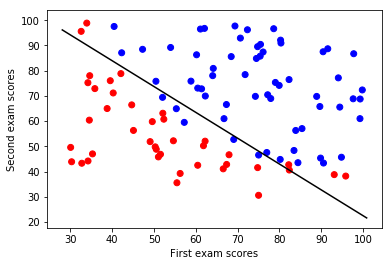

In [32]:
#Plotting Decision Boundary
theta_optimized = results[0]
plot_x = [np.min(features_matrix[:,1]-2), np.max(features_matrix[:,2]+2)]
plot_y = -1/theta_optimized[2]*(theta_optimized[0] 
          + np.dot(theta_optimized[1],plot_x))

plt.plot(plot_x, plot_y, color="black")

colors = ["blue" if i == 1 else "red" for i in acceptance]
plt.xlabel("First exam scores")
plt.ylabel("Second exam scores")
plt.scatter( x = first_exam_scores, y = second_exam_scores, c = colors)
